In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

from distutils.dir_util import copy_tree
# Input из kaggle в working
from_dir = '/kaggle/input/mlds-data'
to_dir = '/kaggle/working/mlds-data'
copy_tree(from_dir,to_dir)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
/kaggle/input/mlds-data/archive/Описание задания.txt
/kaggle/input/mlds-data/archive/dataset.csv


['/kaggle/working/mlds-data/archive/Описание задания.txt',
 '/kaggle/working/mlds-data/archive/dataset.csv']

In [14]:
data = pd.read_csv('/kaggle/working/mlds-data/archive/dataset.csv')
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [16]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [31]:
data.describe(include=['object']).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


<Axes: xlabel='is_promoted', ylabel='count'>

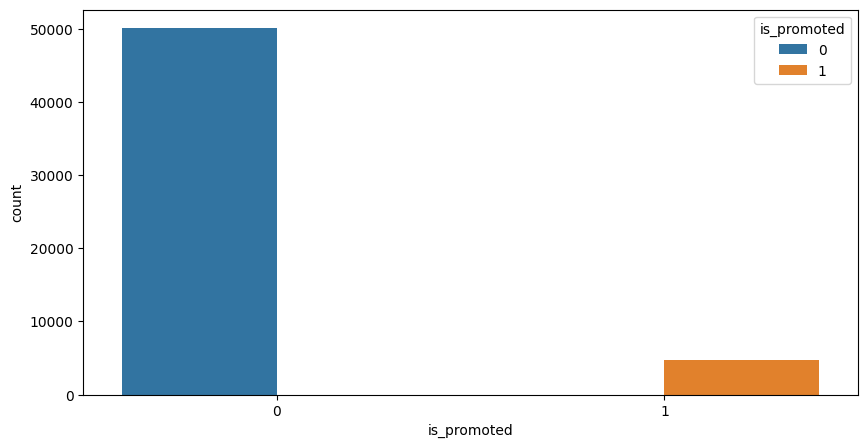

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(x='is_promoted',data=data,hue='is_promoted')

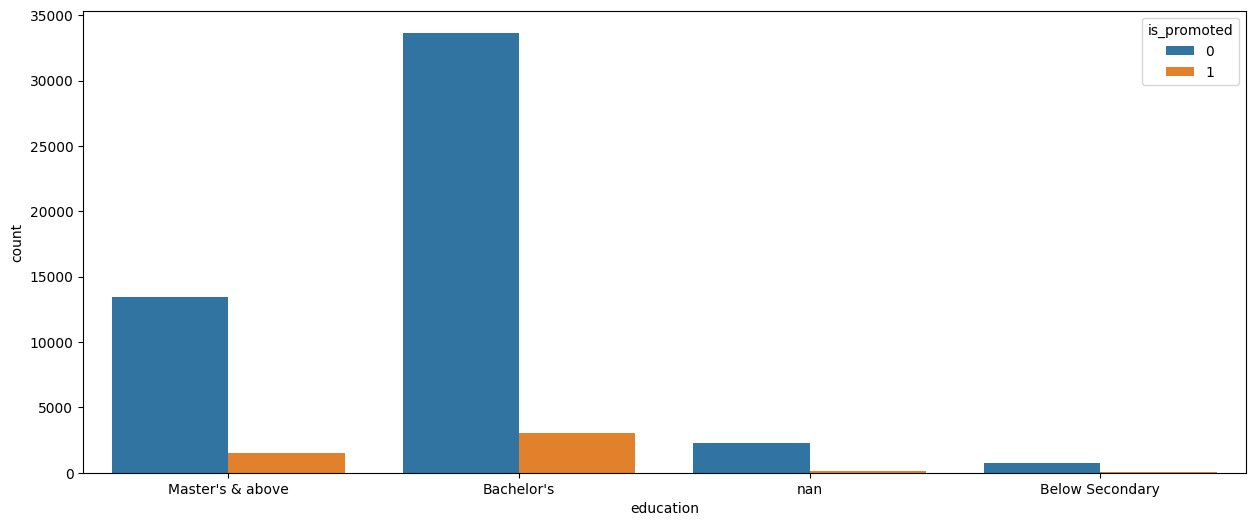

In [92]:
plt.figure(figsize=(15,6))
sns.countplot(x='education',hue='is_promoted',data=data);

<Axes: >

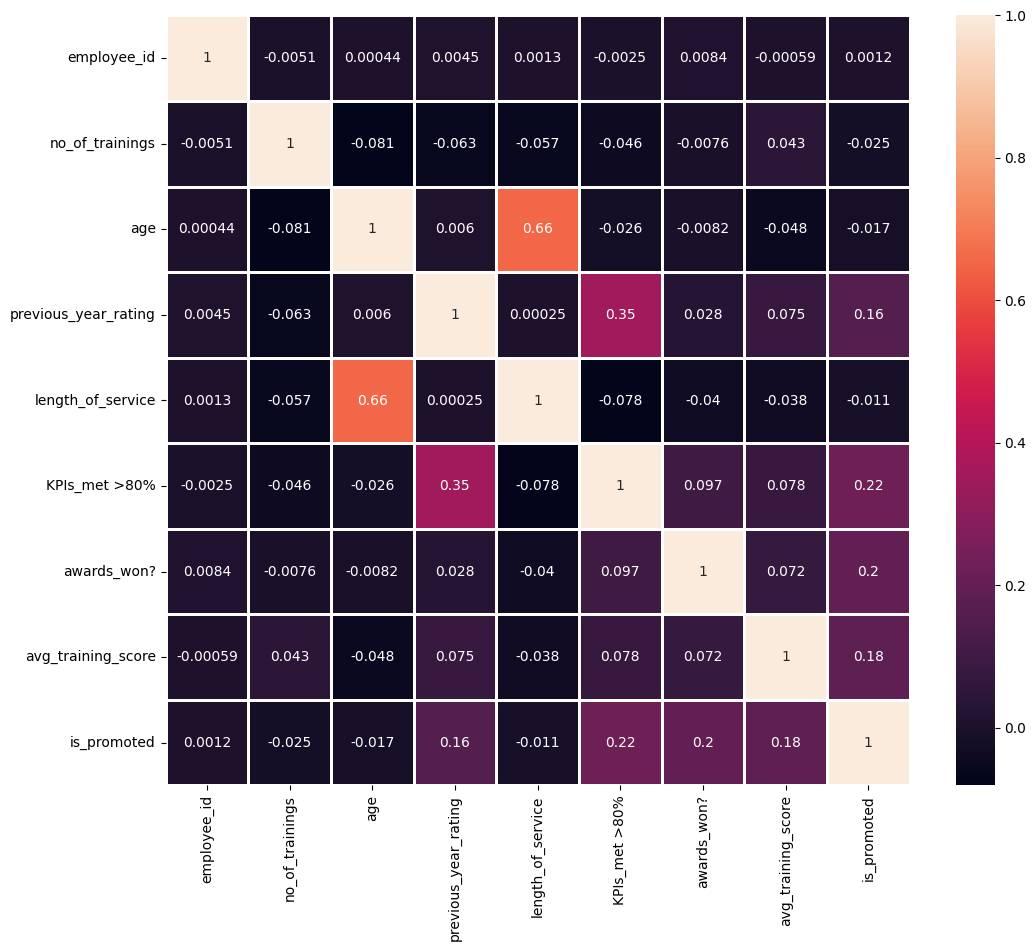

In [90]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, square=False, linewidth=0.8)

In [93]:
x_cols, y_col = data.columns[1:-1], data.columns[-1]
analyze_data, y = data[x_cols].copy(), data[y_col].copy()

# Числовые и категориальные признаки
numeric_cols = data[x_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = data[x_cols].select_dtypes(include='object').columns.tolist()
analyze_data[categorical_cols] = analyze_data[categorical_cols].astype(str)


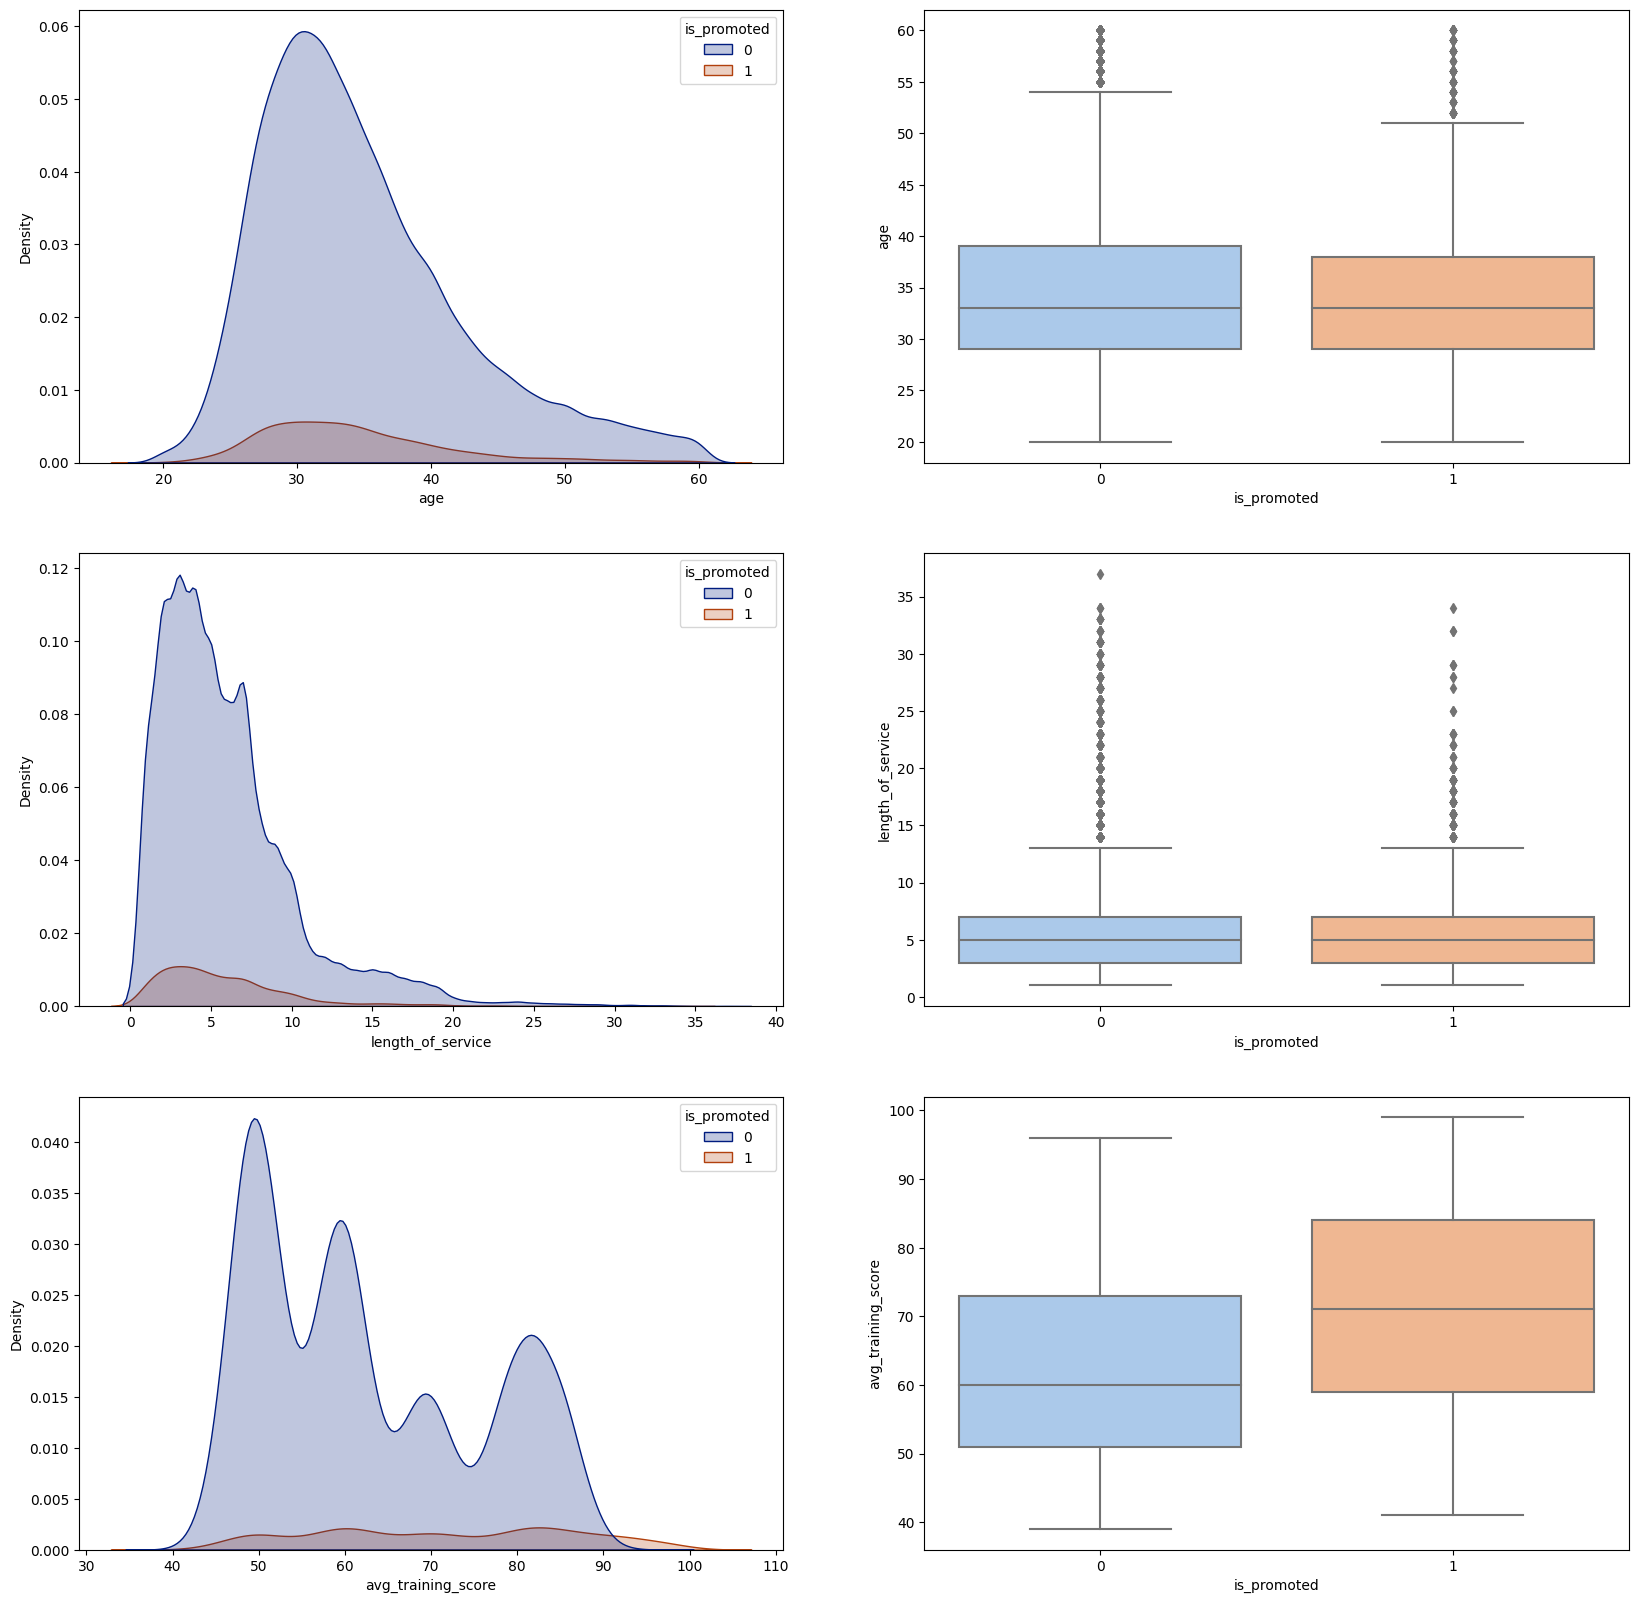

In [94]:
density_vars = ['age', 'length_of_service', 'avg_training_score']
fig, axs = plt.subplots(3, 2, figsize=(20,20))

for i in range(len(density_vars)):
    
    sns.kdeplot(data = data, x = density_vars[i], hue = 'is_promoted', palette = 'dark', fill = True, ax = axs[i][0])
    sns.boxplot(data = data, y = density_vars[i], x = 'is_promoted', palette = 'pastel', ax = axs[i][1])

In [52]:
#Предобработка
imputer = SimpleImputer().fit(analyze_data[numeric_cols])
analyze_data[numeric_cols] = imputer.transform(analyze_data[numeric_cols])

scaler = MinMaxScaler().fit(analyze_data[numeric_cols])
analyze_data[numeric_cols] = scaler.transform(analyze_data[numeric_cols])

analyze_data[categorical_cols] = analyze_data[categorical_cols].astype(str) # для catboost нужен тип str

In [53]:
X_train, X_test, y_train, y_test = train_test_split(analyze_data, y, test_size=0.25, random_state=42)

In [74]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 10, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1, log=True),
        "max_depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.1, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 30, 200),
        "eval_metric": 'AUC',
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 3, 60),
        "loss_function": trial.suggest_categorical("loss_function", ['Logloss', 'CrossEntropy']),
    }

    cb_clf = CatBoostClassifier(**params, silent=True)
    cb_clf.fit(X_train,
          y_train, 
          cat_features=categorical_cols,
          plot=False,
          eval_set = [(X_test, y_test)])
    
    predictions = cb_clf.predict_proba(X_test) 
    roc_auc = roc_auc_score(y_test, predictions[:,1])
    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-06-15 18:35:58,521] A new study created in memory with name: no-name-55627156-7188-4660-afa3-8b3f4d535670
[I 2024-06-15 18:35:58,854] Trial 0 finished with value: 0.8279757889423266 and parameters: {'n_estimators': 19, 'learning_rate': 0.5376006938825901, 'depth': 2, 'subsample': 0.16750229093481062, 'colsample_bylevel': 0.36099106955026894, 'min_data_in_leaf': 130, 'l2_leaf_reg': 55, 'loss_function': 'Logloss'}. Best is trial 0 with value: 0.8279757889423266.
[I 2024-06-15 18:36:15,869] Trial 1 finished with value: 0.9088464172483495 and parameters: {'n_estimators': 301, 'learning_rate': 0.7296443227730255, 'depth': 8, 'subsample': 0.725906177043316, 'colsample_bylevel': 0.4468777601125251, 'min_data_in_leaf': 64, 'l2_leaf_reg': 25, 'loss_function': 'Logloss'}. Best is trial 1 with value: 0.9088464172483495.
[I 2024-06-15 18:36:30,100] Trial 2 finished with value: 0.9126118377940442 and parameters: {'n_estimators': 367, 'learning_rate': 0.7856039040495405, 'depth': 5, 'subsamp

In [80]:
study.best_params

{'n_estimators': 821,
 'learning_rate': 0.09529777191630558,
 'depth': 7,
 'subsample': 0.5361978370942149,
 'colsample_bylevel': 0.6438349905677263,
 'min_data_in_leaf': 165,
 'l2_leaf_reg': 37,
 'loss_function': 'CrossEntropy'}

In [78]:
cb_clf = CatBoostClassifier(**study.best_params, silent=True)
cb_clf.fit(X_train,
          y_train, 
          cat_features=categorical_cols,
          plot=False,
          eval_set = [(X_test, y_test)])
y_predict = cb_clf.predict(X_train)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     37569
           1       0.97      0.37      0.53      3537

    accuracy                           0.94     41106
   macro avg       0.96      0.68      0.75     41106
weighted avg       0.95      0.94      0.93     41106



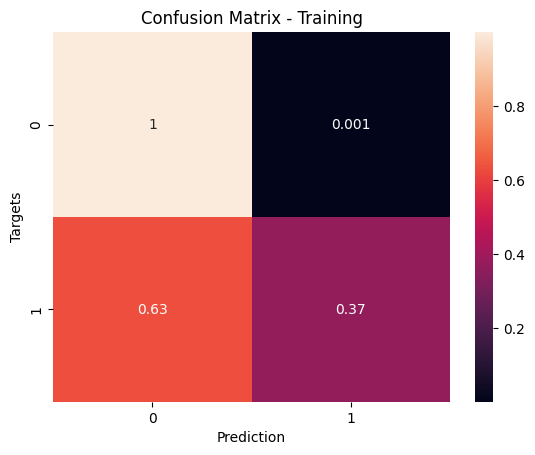

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train_cf = confusion_matrix(y_train, y_predict, normalize='true')
plt.figure()
sns.heatmap(train_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Targets')
plt.title('Confusion Matrix - Training')

print(classification_report(y_train, y_predict))

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
"Как купить полис ОСАГО?",       
"Не пришел полис",                       
"Я пришел к вам за ОСАГО",       
"Как взять не займ, а кредит?", 
"Как взять ОСАГО?"                      
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

similarity_scores = cosine_similarity(X[4:5], X[:4])

sorted_doc_indices = similarity_scores.argsort()[::-1]

print(sorted_doc_indices + 1)

[[2 3 1 4]]
